In [1]:
%matplotlib ipympl
import pyvisco as visco
from pyvisco import styles
styles.format_fig()

***
# Verification - Comparison with APDL 2021 R1

## Master curve in frequency domain

In [2]:
#Load user master curve in frequency domain and user shift factors
data = visco.load.file('./freq_master/freq_user_master.csv')
shift = visco.load.file('./freq_master/freq_user_master__shift_factors.csv')
RefT = -5
domain = 'freq'
modul = 'E'
df_master, units = visco.load.user_master(data, domain, RefT, modul)
df_aT = visco.load.user_shift(shift)

In [3]:
msg = ("Storage modulus ('{0}_stor') and "    
      + "loss modulus('{0}_loss') must have same unit!")

In [4]:
print(msg)

Storage modulus ('{0}_stor') and loss modulus('{0}_loss') must have same unit!


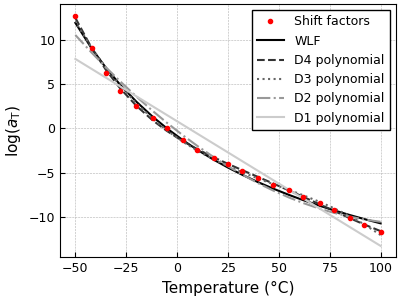

In [5]:
#Shift functions
df_WLF = visco.shift.fit_WLF(df_master.RefT, df_aT)
df_poly_C, df_poly_K = visco.shift.fit_poly(df_aT)

fig_shift, df_shift = visco.shift.plot(df_aT, df_WLF, df_poly_C)

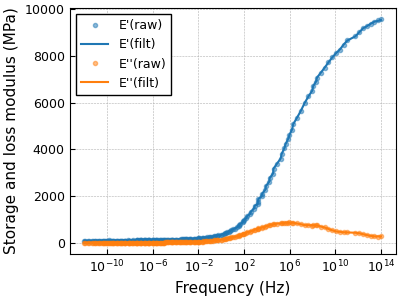

In [6]:
#Smooth master curve
win = 5
df_master = visco.master.smooth(df_master, win)
fig_smooth = visco.master.plot_smooth(df_master, units)

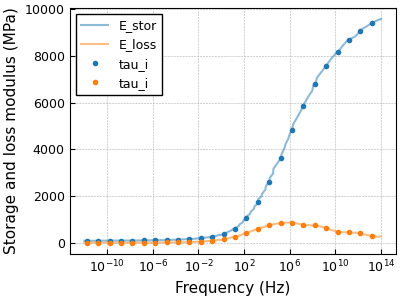

In [7]:
#Discretize number of Prony terms
df_dis = visco.prony.discretize(df_master)
fig_dis = visco.prony.plot_dis(df_master, df_dis, units)

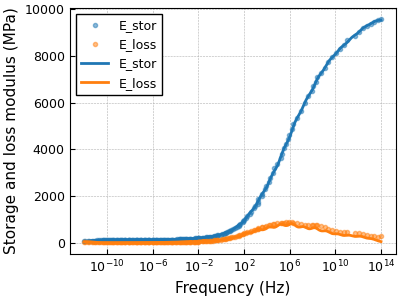

In [8]:
#Fit Prony series parameter
prony, df_GMaxw = visco.prony.fit(df_dis)
fig_fit = visco.prony.plot_fit(df_master, df_GMaxw, units)

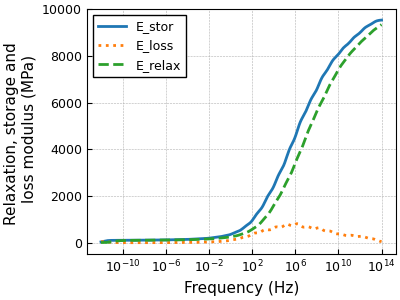

In [9]:
#Plot Generalized Maxwell model
fig_GMaxw = visco.prony.plot_GMaxw(df_GMaxw, units);

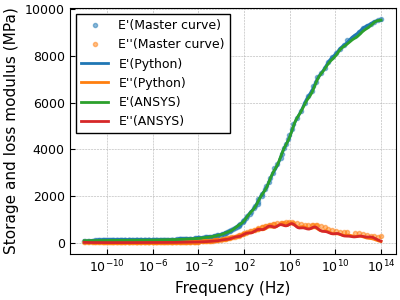

In [10]:
#Compare Python fit with ANSYS APDL
df_prony_ANSYS = visco.verify.load_prony_ANSYS('./freq_master/prony_terms.MPL')
prony_ANSYS = visco.verify.prep_prony_ANSYS(df_prony_ANSYS, prony)
nprony = prony_ANSYS['df_terms'].shape[0]
df_GMaxw_ANSYS = visco.prony.calc_GMaxw(**prony_ANSYS, decades = nprony)
fig_fit_ANSYS = visco.verify.plot_fit_ANSYS(df_master, df_GMaxw, df_GMaxw_ANSYS, units)

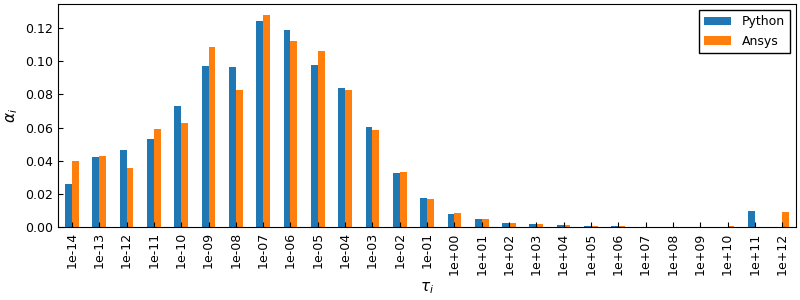

In [11]:
fig_coeff = visco.prony.plot_param([prony, prony_ANSYS], ['Python', 'Ansys'])

### Optional optimization of number of Prony terms

Prony series N = 24: Convergence criterion reached!
Prony series N = 22: Convergence criterion reached!
Prony series N = 20: Convergence criterion reached!
Prony series N = 19: Convergence criterion reached!
Prony series N = 18: Convergence criterion reached!
Prony series N = 17: Convergence criterion reached!
Prony series N = 16: Convergence criterion reached!
Prony series N = 15: Convergence criterion reached!
Prony series N = 14: Convergence criterion reached!
Prony series N = 13: Convergence criterion reached!
Prony series N = 12: Convergence criterion reached!
Prony series N = 11: Convergence criterion reached!
Prony series N = 10: Convergence criterion reached!
Prony series N = 09: Convergence criterion reached!
Prony series N = 08: Convergence criterion reached!
Prony series N = 07: Convergence criterion reached!
Prony series N = 06: Convergence criterion reached!
Prony series N = 05: Convergence criterion reached!
Prony series N = 04: Convergence criterion reached!
Prony series

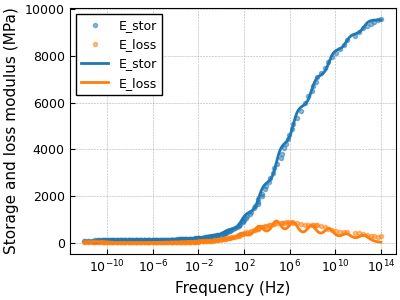

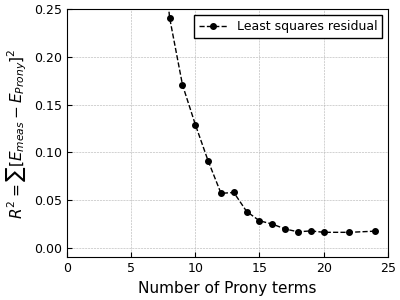

In [12]:
dict_prony, N_opt, N_opt_err = visco.opt.nprony(df_master, prony, window='min')
df_GMaxw_opt, fig_opt = visco.opt.plot_fit(df_master, dict_prony, N_opt, units)
fig_res = visco.opt.plot_residual(N_opt_err)

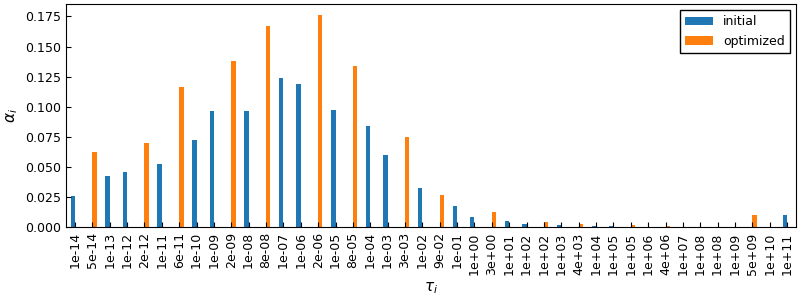

In [13]:
fig_coeff = visco.prony.plot_param([prony, dict_prony[N_opt]], ['initial', 'optimized'])